In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report

In [10]:
df = pd.read_csv("breast-cancer.csv")
if 'Unnamed: 0' in df.columns:
    df = df.drop(columns=['Unnamed: 0'])
df.drop(columns=['id'], inplace=True)
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

X = df.drop(columns=['diagnosis'])
y = df['diagnosis']


In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [14]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [16]:
svm_linear = SVC(kernel='linear', C=1)
svm_linear.fit(X_train_scaled, y_train)

svm_rbf = SVC(kernel='rbf', C=1, gamma='scale')
svm_rbf.fit(X_train_scaled, y_train)

print("Linear Kernel SVM Report:")
print(classification_report(y_test, svm_linear.predict(X_test_scaled)))
print("\nRBF Kernel SVM Report:")
print(classification_report(y_test, svm_rbf.predict(X_test_scaled)))


Linear Kernel SVM Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        72
           1       1.00      0.90      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114


RBF Kernel SVM Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        72
           1       1.00      0.93      0.96        42

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114



In [18]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [8]:
def plot_decision_boundary(model, X, y, title):
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(6, 5))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.coolwarm)
    plt.title(title)
    plt.xlabel("PCA Feature 1")
    plt.ylabel("PCA Feature 2")
    plt.show()


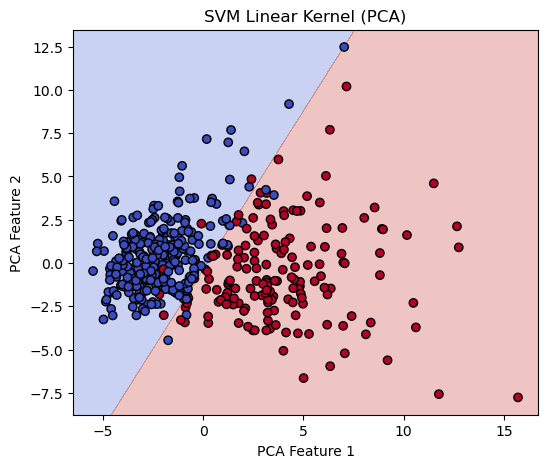

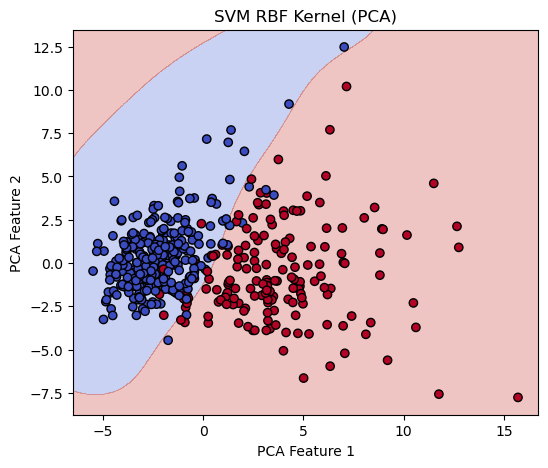

In [20]:
svm_linear_pca = SVC(kernel='linear', C=1)
svm_linear_pca.fit(X_train_pca, y_train)
plot_decision_boundary(svm_linear_pca, X_train_pca, y_train, "SVM Linear Kernel (PCA)")

svm_rbf_pca = SVC(kernel='rbf', C=1, gamma='scale')
svm_rbf_pca.fit(X_train_pca, y_train)
plot_decision_boundary(svm_rbf_pca, X_train_pca, y_train, "SVM RBF Kernel (PCA)")

In [22]:
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.01, 0.1, 1, 'scale'],
    'kernel': ['rbf']
}
grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)
print("\nBest Parameters:", grid_search.best_params_)
print("Best CV Score:", grid_search.best_score_)



Best Parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Best CV Score: 0.9758241758241759


In [25]:
cv_scores = cross_val_score(SVC(**grid_search.best_params_), X_train_scaled, y_train, cv=5)
print("Mean CV Accuracy:", cv_scores.mean())


Mean CV Accuracy: 0.9758241758241759
